In [ ]:
 from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import re, time
from nltk.stem.porter import PorterStemmer

In [ ]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import json
import urllib
import os

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_json('/content/drive/MyDrive/data/Sarcasm/Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [ ]:
df[:10]

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [ ]:
df.shape

(28619, 3)

In [ ]:
print(df.isnull().any(axis = 0))

is_sarcastic    False
headline        False
article_link    False
dtype: bool


In [ ]:
df.drop_duplicates(subset=['headline'], inplace = True)
df.duplicated().sum()

0

In [ ]:
df.describe(include = 'all')

,is_sarcastic,headline,article_link
count,28503.000000,28503,28503
unique,NaN,28503,28503
top,NaN,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
freq,NaN,1,1
mean,0.475459,NaN,NaN
std,0.499406,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,1.000000,NaN,NaN


In [ ]:
df['headline'][10]

'this lesbian is considered a father in indiana (and an amazing one at that)'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='is_sarcastic', ylabel='count'>

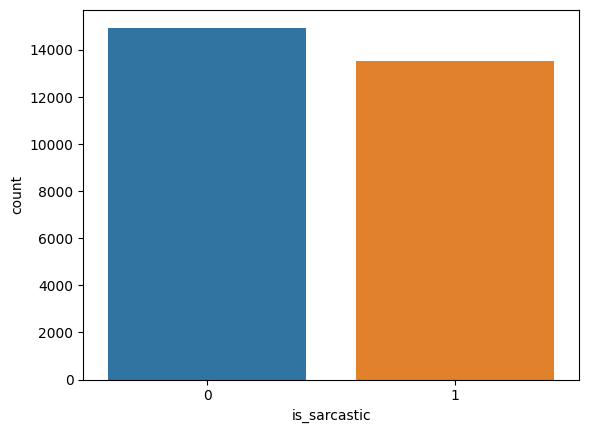

In [ ]:
sns.countplot(x = "is_sarcastic", data = df)

Text(0.5, 1.0, 'Not Sarcastic text length')

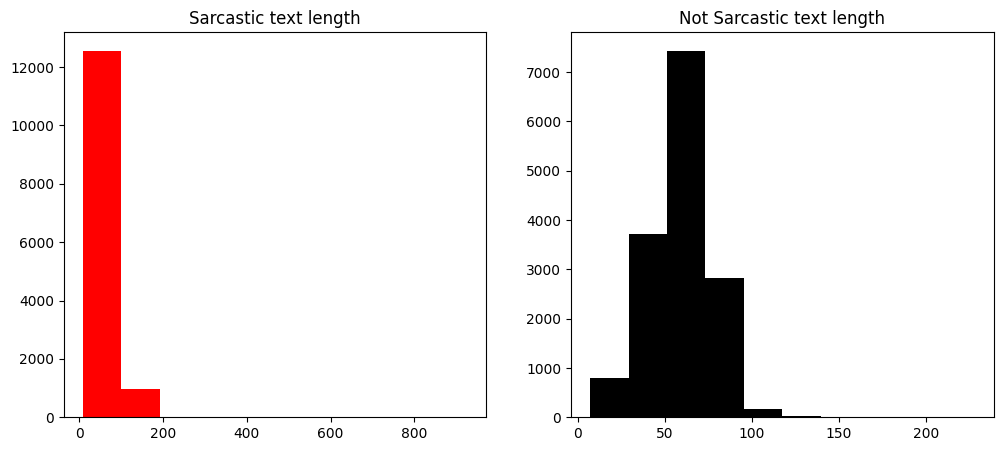

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
text_len=df[df['is_sarcastic']==1]['headline'].apply(len)
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text length')
text_len=df[df['is_sarcastic']==0]['headline'].apply(len)
ax2.hist(text_len,color='black')
ax2.set_title('Not Sarcastic text length' )

Text(0.5, 1.0, 'Not Sarcastic text word count')

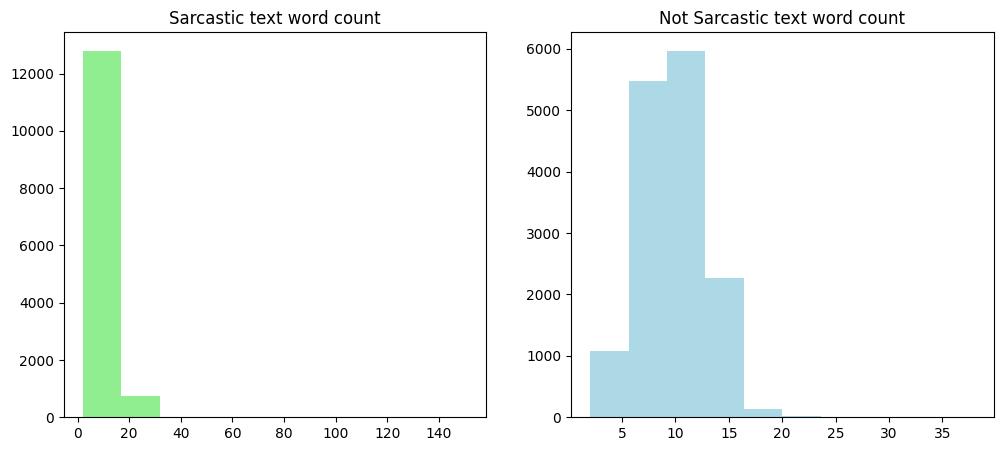

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='lightgreen')
ax1.set_title('Sarcastic text word count')
text_len=df[df['is_sarcastic']==0]['headline'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='lightblue')
ax2.set_title('Not Sarcastic text word count')

# PREPROCESSING

In [ ]:
df['cleaned_headline'] = df['headline'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))
df['cleaned_headline'] = df['cleaned_headline'].apply(lambda x: re.sub('\s+', ' ', x).strip())
print(df['cleaned_headline'])

0        thirtysomething scientists unveil doomsday clo...
1        dem rep totally nails why congress is falling ...
2           eat your veggies deliciously different recipes
3        inclement weather prevents liar from getting t...
4        mother comes pretty close to using word stream...
                               ...                        
28614         jews to celebrate rosh hashasha or something
28615    internal affairs investigator disappointed con...
28616    the most beautiful acceptance speech this week...
28617    mars probe destroyed by orbiting spielberggate...
28618                   dad clarifies this not a food stop
Name: cleaned_headline, Length: 28503, dtype: object


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Download the stopwords corpus
nltk.download('stopwords')

# ... your code ...

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

df['final_text'] = df['cleaned_headline'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x.lower()) if word not in stop_words]))
df['final_text']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        thirtysometh scientist unveil doomsday clock h...
1        dem rep total nail congress fall short gender ...
2                            eat veggi delici differ recip
3                  inclement weather prevent liar get work
4         mother come pretti close use word stream correct
                               ...                        
28614                      jew celebr rosh hashasha someth
28615    intern affair investig disappoint conspiraci d...
28616          beauti accept speech week came queer korean
28617       mar probe destroy orbit spielbergg space palac
28618                                dad clarifi food stop
Name: final_text, Length: 28503, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download necessary NLTK resources (if not already downloaded)
nltk.download('stopwords')  # Download stopwords (if not already downloaded)

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Assuming 'df' is your DataFrame and 'cleaned_headline' is a column containing the cleaned headlines
df['final_text'] = df['cleaned_headline'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x.lower()) if word not in stop_words]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import collections

words = []  # List to store individual words from headlines

for text in df['headline']:
    words.extend(text.split())

word_count = collections.Counter(words)  # Count the occurrences of each word
top_words = dict(word_count.most_common(10))  # Get the top 10 most common words

# Continue with the rest of your code (e.g., plotting)
plt.style.use('dark_background')

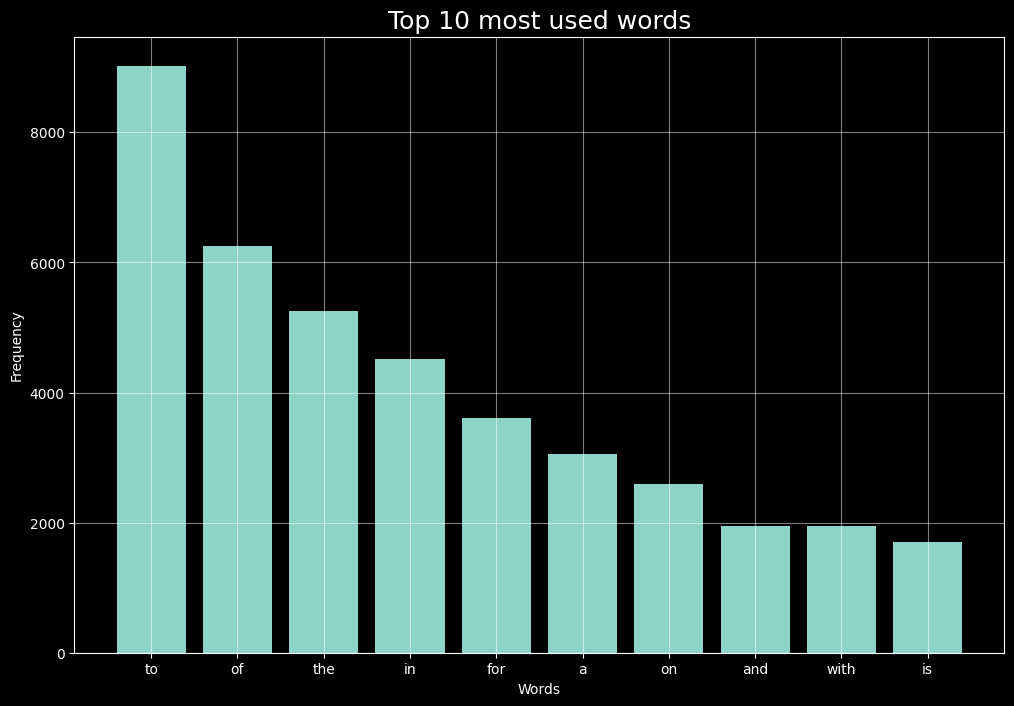

In [ ]:
words = []
for text in df['headline']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

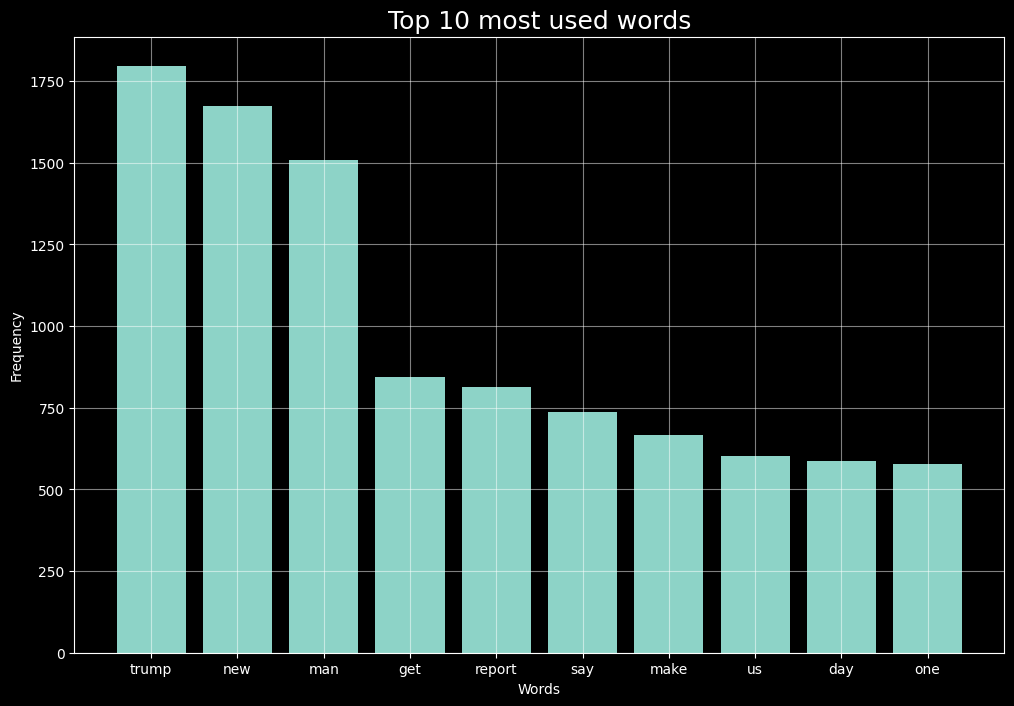

In [ ]:
words = []
for text in df['final_text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

# LABEL AND SENTENCES

In [ ]:
labels = np.array(df.is_sarcastic)
sentences = np.array(df.final_text)
print('Number of sentences and labels: ', len(labels), len(sentences))

Number of sentences and labels:  28503 28503


In [ ]:
sentences

array(['thirtysometh scientist unveil doomsday clock hair loss',
       'dem rep total nail congress fall short gender racial equal',
       'eat veggi delici differ recip', ...,
       'beauti accept speech week came queer korean',
       'mar probe destroy orbit spielbergg space palac',
       'dad clarifi food stop'], dtype=object)

In [ ]:
labels

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
from wordcloud import WordCloud  # Import the WordCloud class

text = ' '.join(caption for caption in df['final_text'])

wordcloud = WordCloud(width=800, height=500, background_color='black', min_font_size=10).generate(text)

# Continue with the rest of your code

# WORD GRAPH

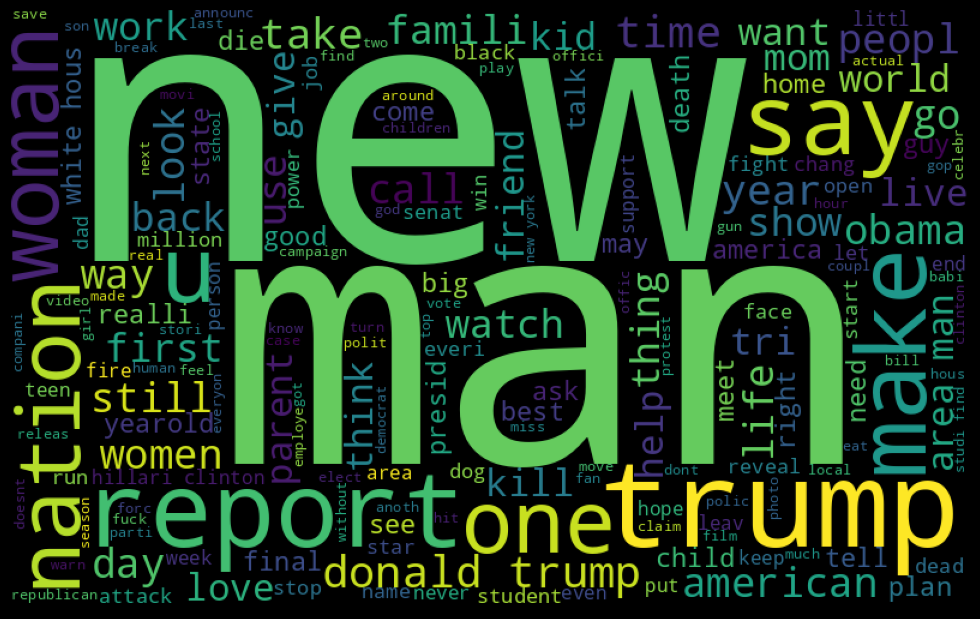

In [ ]:
text = ' '.join(caption for caption in df['final_text'])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'black',
                min_font_size = 10).generate(text)

plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


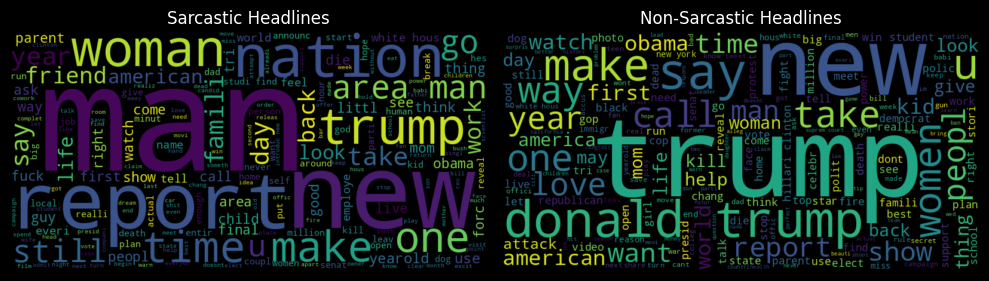

In [ ]:
sarcastic_text = ' '.join(df[df['is_sarcastic'] == 1]['final_text'])
non_sarcastic_text = ' '.join(df[df['is_sarcastic'] == 0]['final_text'])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
wordcloud_sarcastic = WordCloud(width=800, height=400).generate(sarcastic_text)
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.title('Sarcastic Headlines')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_non_sarcastic = WordCloud(width=800, height=400).generate(non_sarcastic_text)
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.title('Non-Sarcastic Headlines')
plt.axis('off')

plt.tight_layout()
plt.show()

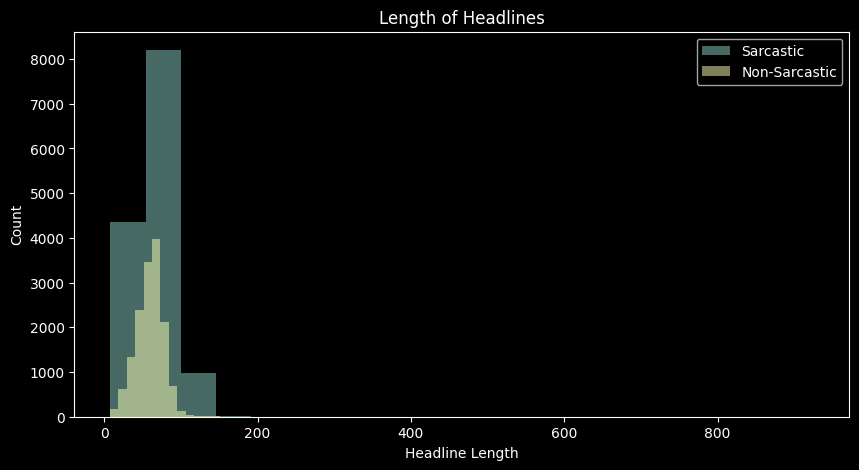

In [ ]:
df['headline_length'] = df['headline'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(df[df['is_sarcastic'] == 1]['headline_length'], bins=20, alpha=0.5, label='Sarcastic')
plt.hist(df[df['is_sarcastic'] == 0]['headline_length'], bins=20, alpha=0.5, label='Non-Sarcastic')
plt.xlabel('Headline Length')
plt.ylabel('Count')
plt.legend()
plt.title('Length of Headlines')
plt.show()

# TRAIN TEST SPLIT

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2)
print('Train and Test set distribution: ', len(x_train), len(x_test), len(y_train), len(y_test))

Train and Test set distribution:  22802 5701 22802 5701


In [ ]:
vocab_size = 10000
max_length = 32
embedding_dim = 32
padding_type='post'
oov_token = '<OOV>'

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

# Padding

In [ ]:
train_sequences = tokenizer.texts_to_sequences(x_train)
padded_train_sequences = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type)

test_sequences = tokenizer.texts_to_sequences(x_test)
padded_test_sentences = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type)

# USING GLOVE EMBEDDINGS

In [ ]:
embedding_dim = 100

# Load pre-trained GloVe embeddings
embeddings_index = {}
with open('/content/drive/MyDrive/Final Project/Model/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

# Create an embedding matrix
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
df1 = pd.read_json('/content/drive/MyDrive/data/Sarcasm/Sarcasm_Headlines_Dataset.json', lines = True)

In [ ]:
df1[:10]

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [ ]:
df1.shape

(26709, 3)

In [ ]:
print(df1.isnull().any(axis = 0))

article_link    False
headline        False
is_sarcastic    False
dtype: bool


In [ ]:
df2 = pd.concat([df1, df], axis=0)
df2[:10]

,article_link,headline,is_sarcastic,cleaned_headline,final_text,headline_length
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,NaN,NaN,NaN
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,NaN,NaN,NaN
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,NaN,NaN,NaN
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,NaN,NaN,NaN
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,NaN,NaN,NaN
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0,NaN,NaN,NaN
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0,NaN,NaN,NaN
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0,NaN,NaN,NaN
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1,NaN,NaN,NaN
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0,NaN,NaN,NaN


In [ ]:
print(df2.isnull().any(axis = 0))

article_link        False
headline            False
is_sarcastic        False
cleaned_headline     True
final_text           True
headline_length      True
dtype: bool


In [ ]:
# Relacing special symbols and digits in headline column
# re stands for Regular Expression
df2['headline'] = df['headline'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))

In [ ]:
# getting features and labels
features = df2['headline']
labels = df2['is_sarcastic']

In [ ]:
ps = PorterStemmer()

# Replace missing values with empty strings
features = features.fillna('')

# Split and stem the data
features = features.apply(lambda x: x.split() if isinstance(x, str) else [])
features = features.apply(lambda x: ' '.join([ps.stem(word) for word in x]))



In [ ]:
# vectorizing the data with maximum of 5000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()

In [ ]:
# getting training and testing data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .05, random_state = 0)

In [ ]:
# model 1:-
# Using linear support vector classifier
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
# getting the score of train and test data
print(lsvc.score(features_train, labels_train)) # 90.93
print(lsvc.score(features_test, labels_test))   # 83.75

0.7104535661855828
0.6497645780514306


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
lsvc_preds = lsvc.predict(features_test)
precision = precision_score(labels_test, lsvc_preds)
recall = recall_score(labels_test, lsvc_preds)
f1 = f1_score(labels_test, lsvc_preds)
auc_roc = roc_auc_score(labels_test, lsvc_preds)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


Precision: 0.64
Recall: 0.59
F1 score: 0.61
AUC-ROC: 0.65


In [ ]:
# model 2:-
# Logistic Regression
lr = LogisticRegression()
lr.fit(features_train, labels_train)
print(lr.score(features_train, labels_train))   # 88.16
print(lr.score(features_test, labels_test))     # 83.08

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7095384263407752
0.659181455994205


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
lr_preds = lr.predict(features_test)
precision = precision_score(labels_test, lr_preds)
recall = recall_score(labels_test, lr_preds)
f1 = f1_score(labels_test, lr_preds)
auc_roc = roc_auc_score(labels_test, lr_preds)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


Precision: 0.65
Recall: 0.59
F1 score: 0.62
AUC-ROC: 0.66


In [ ]:
# model 3:-
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)
print(rfc.score(features_train, labels_train))  # 98.82
print(rfc.score(features_test, labels_test))    # 79.71

0.7701664410592743
0.5229989134371604


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
rfc_preds = rfc.predict(features_test)
rfc_preds = rfc.predict(features_test)
recall = recall_score(labels_test, rfc_preds)
f1 = f1_score(labels_test, rfc_preds)
auc_roc = roc_auc_score(labels_test, rfc_preds)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


Precision: 0.65
Recall: 0.48
F1 score: 0.49
AUC-ROC: 0.52
